In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from get_coords import domains, get_coords
from structure import Structure
from G_phi_psi import make_distmap, calc_dihedral

from optimize import *
from copy import copy
#%matplotlib widget

In [2]:
coords_real = get_coords('16pkA01')

phi = torch.load('16pkA01_phi.pt')
psi = torch.load('16pkA01_psi.pt')

phi = np.radians(phi[1:])
psi = np.radians(psi[:-1])

phi.requires_grad_(True)
psi.requires_grad_(True)

seq = domains['16pkA01'][2]

# real distmap
c = []
for i in coords_real:
    if i[3] == 'CA' and i[2] == 'G':
        c.append(i[4:])
    elif i[3] == 'CB':
        c.append(i[4:])
        
c = torch.tensor(c, dtype=torch.float)

dist_map_real = make_distmap(c)

In [3]:
G_16pk = Structure(phi, psi, dist_map_real, seq)

In [4]:
G_16pk.G()

tensor([[ 0.0000,  5.5894,  8.7316,  ..., 18.3036, 14.8335, 19.4084],
        [ 0.0000,  0.0000,  5.6880,  ..., 16.7280, 13.6736, 16.9645],
        [ 0.0000,  0.0000,  0.0000,  ..., 12.2200, 10.5035, 13.8901],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  4.9464,  6.1522],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  5.7634],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       grad_fn=<CopySlices>)

In [5]:
G_16pk.visualize_structure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
cl, cb = G_16pk.G_full()

In [15]:
ph = []
for i in range(0, len(cl)-3, 3):
    ph.append(calc_dihedral(cl[i:(i+4)]))

In [20]:
psi

tensor([-0.7505,  2.5133,  2.4609,  2.9671, -0.5934, -0.3142,  0.0698,  2.6180,
         2.0595, -0.2618,  2.1293,  0.0000,  2.5307,  1.9199,  2.0944,  2.0769,
         2.0944,  1.8326,  2.8798,  1.7104,  0.4363,  1.2217,  2.6704,  2.3387,
         2.4784,  2.1293,  0.6632,  0.0175,  2.4260,  2.2340, -0.0698,  1.8850,
         0.2443, -0.8203, -0.5934, -0.7679, -0.7156, -0.4189, -0.3142, -0.8552,
        -0.6981, -0.7854, -0.7330, -0.6807, -0.8029, -0.8727, -0.7505, -0.6283,
        -0.0349,  0.3840, -3.0543,  2.7751,  2.3038,  1.7977,  2.3736,  2.3736,
         2.9845,  2.8100,  2.2340, -2.6878,  1.2217,  2.7227, -0.9076,  2.7402,
         2.5831,  2.4609, -0.6109, -0.5934, -0.1920, -0.7854, -0.9425, -0.9599,
        -0.8378, -0.5760, -0.6807, -0.1571, -0.0175,  2.9496,  2.0769,  2.0944,
         0.1396,  2.4609,  1.9897, -0.7505, -0.4363,  0.3491,  2.5482,  0.0349,
        -0.7679, -0.4363, -0.6632, -0.8029, -0.8029, -0.6981, -0.7330, -0.7505,
        -0.7156, -0.6632, -0.3491,  0.71

In [23]:
np.round(np.array(ph), 4)

array([-0.7505,  2.5133,  2.4609,  2.9671, -0.5934, -0.3142,  0.0698,
        2.618 ,  2.0595, -0.2618,  2.1293, -0.    ,  2.5307,  1.9199,
        2.0944,  2.0769,  2.0944,  1.8326,  2.8798,  1.7104,  0.4363,
        1.2217,  2.6704,  2.3387,  2.4784,  2.1293,  0.6632,  0.0175,
        2.426 ,  2.234 , -0.0698,  1.885 ,  0.2443, -0.8203, -0.5934,
       -0.7679, -0.7156, -0.4189, -0.3142, -0.8552, -0.6981, -0.7854,
       -0.733 , -0.6807, -0.8029, -0.8727, -0.7505, -0.6283, -0.0349,
        0.384 , -3.0543,  2.7751,  2.3038,  1.7977,  2.3736,  2.3736,
        2.9845,  2.81  ,  2.234 , -2.6878,  1.2217,  2.7227, -0.9076,
        2.7402,  2.5831,  2.4609, -0.6109, -0.5934, -0.192 , -0.7854,
       -0.9425, -0.9599, -0.8378, -0.576 , -0.6807, -0.1571, -0.0175,
        2.9496,  2.0769,  2.0944,  0.1396,  2.4609,  1.9897, -0.7505,
       -0.4363,  0.3491,  2.5482,  0.0349, -0.7679, -0.4363, -0.6632,
       -0.8029, -0.8029, -0.6981, -0.733 , -0.7505, -0.7156, -0.6632,
       -0.3491,  0.7

In [24]:
l = loss(td, dist_map_real)

In [26]:
l.backward()

In [16]:
G_16pk.phi.grad

In [5]:
s, h = optimize(G_16pk, iterations=2, lr=1e-1)

Iteration 0, Loss: 74858.0546875
Iteration 1, Loss: 78932.1796875


In [ ]:
torch.std

# Small Protein - 1a02F00

In [3]:
def visualize_structure(backbone, cbeta_coords, seq):
    
    """Visualizes the entire structure: backbone + C-beta atoms
    
    In the first step generates a list of residue coordinates:
        If Glycin: only N, CA, C atoms are present.
        Else: N, CA, CB, CA, C (the CA is there twice to make the plotting easier)
    """
    
    fig = plt.figure()
    
    entire_structure = torch.empty((len(backbone) + 2 * len(cbeta_coords), 3))
    
    it = 0
    cb_it = 0
    for i in range(len(seq)):
        N, CA, C = backbone[(3 * i):(3 * i + 3)]
        
        if seq[i] != 'G':
            CB = cbeta_coords[cb_it]
            cb_it += 1
            entire_structure[it:(it+5)] = torch.cat([N, CA, CB, CA, C]).view((5, 3))
            it += 5
        else:
            entire_structure[it:(it+3)] = torch.cat([N, CA, C]).view((3, 3))
            it += 3
    #return entire_structure       
    c = entire_structure.data.numpy()

    ax = fig.gca(projection='3d')
    ax.plot(c[:, 0], c[:, 1], c[:, 2])

    #ax.scatter(c[:, 0], c[:, 1], c[:, 2], s=100)

In [4]:
coords = get_coords('1a02F00')

backbone = torch.from_numpy(coords[:, 4:][coords[:, 3] != 'CB'].astype(np.float))
cbeta = torch.from_numpy(coords[:, 4:][coords[:, 3] == 'CB'].astype(np.float))

phi = torch.load('1a02F00_phi.pt')
psi = torch.load('1a02F00_psi.pt')

phi = np.radians(phi[1:])
psi = np.radians(psi[:-1])

#phi.requires_grad_(True)
#psi.requires_grad_(True)

with open('1a02F00.fasta') as f:
    f.readline()
    seq = f.readline()

/home/tomas/miniconda3/envs/pyml/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4375.
  PDBConstructionWarning)
/home/tomas/miniconda3/envs/pyml/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4395.
  PDBConstructionWarning)
/home/tomas/miniconda3/envs/pyml/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 4413.
  PDBConstructionWarning)
/home/tomas/miniconda3/envs/pyml/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 4459.
  PDBConstructionWarning)
/home/tomas/miniconda3/envs/pyml/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 4462.
  PDBConstructionWarning)


In [5]:
# real distmap
c = []
for i in coords:
    if i[3] == 'CA' and i[2] == 'G':
        c.append(i[4:])
    elif i[3] == 'CB':
        c.append(i[4:])
        
c = torch.tensor(c, dtype=torch.float)

dist_map_real = make_distmap(c)

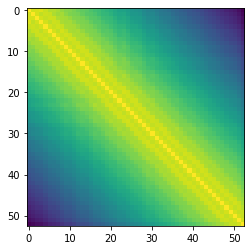

In [6]:
plt.imshow(dist_map_real, cmap='viridis_r')

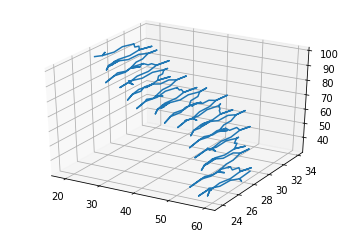

In [7]:
visualize_structure(backbone, cbeta, seq)

In [8]:
G_1a02 = Structure(phi, psi, dist_map_real, seq)

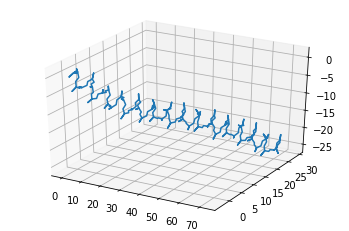

In [9]:
G_1a02.visualize_structure()

In [10]:
with torch.no_grad():
    dp = G_1a02.G()

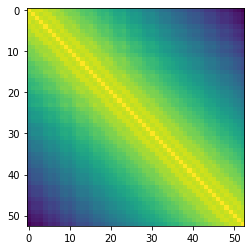

In [11]:
%matplotlib inline
plt.imshow(dp + dp.t(), 'viridis_r')

# Messing it up

In [12]:
torch.manual_seed(1)

phi_raw = torch.load('1a02F00_phi.pt')
psi_raw = torch.load('1a02F00_psi.pt')

phi_raw = np.radians(phi_raw[1:])
psi_raw = np.radians(psi_raw[:-1])

phi = phi_raw + torch.randn(len(phi))/3
psi = psi_raw + torch.randn(len(phi))/3

#phi.requires_grad_(True)
#psi.requires_grad_(True)

G_messedup = Structure(phi, psi, dist_map_real, seq)

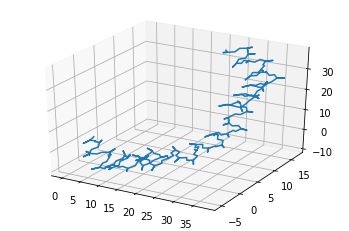

In [13]:
G_messedup.visualize_structure()

In [14]:
def optimize(structure0, 
             iterations=100, 
             lr=1e-3, 
             lr_decay=1,
             min_lr=1e-10,
             decay_frequency=10,
             normalize_gradients=True,
             momentum=0,
             nesterov=False,
             verbose=1, 
             img_dir=None):
    """
    Optimize structure (phi and psi angles) given a label
    """
    history = []
    min_loss = np.inf
    
    structure = copy(structure0)
    
    if momentum > 1 or momentum < 0:
        print('Momentum parameter has to be between 0 and 1')
        return
    
    # initialize V for momentum
    V_phi, V_psi = torch.zeros((len(structure.phi))), torch.zeros((len(structure.psi)))
    
    for i in range(iterations):
        if structure.phi.grad is not None:
            structure.phi.grad.zero_()
        if structure.psi.grad is not None:
            structure.psi.grad.zero_()
        
        if nesterov:
            structure.phi = (structure.phi + momentum * V_phi).detach().requires_grad_()
            structure.psi = (structure.psi + momentum * V_psi).detach().requires_grad_()
            
        temp_distmap = structure.G()
        L = loss(temp_distmap, structure.Y)
        L.backward()
        #print(structure.phi.grad[:5], structure.phi.grad[:5])
        if normalize_gradients:
            # normalize gradients
            structure.phi.grad = (structure.phi.grad - torch.mean(structure.phi.grad)) / torch.std(structure.phi.grad)
            structure.psi.grad = (structure.psi.grad - torch.mean(structure.psi.grad)) / torch.std(structure.psi.grad)
        #print(structure.phi.grad[:5], structure.phi.grad[:5])
        # Implementing momentum
        
        V_phi = momentum * V_phi - lr * structure.phi.grad
        V_psi = momentum * V_psi - lr * structure.phi.grad
        
        structure.phi = (structure.phi + V_phi).detach().requires_grad_()
        structure.psi = (structure.psi + V_psi).detach().requires_grad_()
        
        if verbose is not None:
            if i % verbose == 0:
                print(f'Iteration {i}, Loss: {L.item()}')
                
        history.append([i, L.item()])
        
        if i % decay_frequency == 0 and i > 0:
            lr *= lr_decay
        
        if L.item() < min_loss:
            best_structure = copy(structure)
            min_loss = L.item()
            
        if img_dir is not None:
            structure.visualize_structure('{}/iter_{:04d}.png'.format(img_dir, i))
        
        if lr < min_lr:
            break
    return best_structure, min_loss, np.array(history)

In [20]:
def optimize0(structure0, 
             iterations=100, 
             lr=1e-3, 
             lr_decay=1,
             min_lr=1e-10,
             decay_frequency=10,
             normalize_gradients=True,
             momentum=0,
             nesterov=False,
             verbose=1, 
             img_dir=None):
    """
    Optimize structure (phi and psi angles) given a label
    """
    history = []
    min_loss = np.inf
    
    structure = copy(structure0)
    
    if momentum > 1 or momentum < 0:
        print('Momentum parameter has to be between 0 and 1')
        return
    
    # initialize V for momentum
    V = torch.zeros((len(structure.torsion)))
    
    for i in range(iterations):
        if structure.torsion.grad is not None:
            structure.torsion.grad.zero_()
        
        if nesterov:
            structure.torsion = (structure.torsion + momentum * V).detach().requires_grad_()
            
        temp_distmap = structure.G()
        L = loss(temp_distmap, structure.Y)
        L.backward()
        
        #print(structure.torsion.grad[:5])
        if normalize_gradients:
            # normalize gradients
            structure.torsion.grad = (structure.torsion.grad - torch.mean(structure.torsion.grad)) / torch.std(structure.torsion.grad)
        
        #print(structure.phi.grad[:5], structure.phi.grad[:5])
        
        # Implementing momentum
        V = momentum * V - lr * structure.torsion.grad
        
        structure.torsion = (structure.torsion + V).detach().requires_grad_()
        
        if verbose is not None:
            if i % verbose == 0:
                print(f'Iteration {i}, Loss: {L.item()}')
                
        history.append([i, L.item()])
        
        if i % decay_frequency == 0 and i > 0:
            lr *= lr_decay
        
        if L.item() < min_loss:
            best_structure = copy(structure)
            min_loss = L.item()
            
        if img_dir is not None:
            structure.visualize_structure('{}/iter_{:04d}.png'.format(img_dir, i))
        
        if lr < min_lr:
            break
            
    return best_structure, min_loss, np.array(history)

In [21]:
o = optimize0(G_messedup, 200, lr=1e-5, verbose = 20, normalize_gradients=False)

Iteration 0, Loss: 1825.02197265625
Iteration 20, Loss: 1802.357177734375
Iteration 40, Loss: 1806.6563720703125
Iteration 60, Loss: 1758.377685546875
Iteration 80, Loss: 1708.9852294921875
Iteration 100, Loss: 1656.1739501953125
Iteration 120, Loss: 1643.623779296875
Iteration 140, Loss: 1627.8616943359375
Iteration 160, Loss: 1626.63037109375
Iteration 180, Loss: 1628.70166015625


In [24]:
%matplotlib widget
o[0].visualize_structure()#

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Experimenting on theoretical data

### BASELINE

In [29]:
o1 = optimize(G_messedup, 200, verbose = 20)

Iteration 0, Loss: 5388.533203125
Iteration 20, Loss: 5294.443359375
Iteration 40, Loss: 5213.3984375
Iteration 60, Loss: 5145.982421875
Iteration 80, Loss: 5092.630859375
Iteration 100, Loss: 5053.60400390625
Iteration 120, Loss: 5028.25732421875
Iteration 140, Loss: 5014.888671875
Iteration 160, Loss: 5010.62890625
Iteration 180, Loss: 5011.1318359375


### Effect of learning rate

$\alpha = 0.01$

In [30]:
o2 = optimize(G_messedup, 200, verbose=20, lr=0.01)

Iteration 0, Loss: 5388.533203125
Iteration 20, Loss: 4993.23583984375
Iteration 40, Loss: 3765.787109375
Iteration 60, Loss: 3522.111328125
Iteration 80, Loss: 3828.93212890625
Iteration 100, Loss: 4044.979248046875
Iteration 120, Loss: 3731.842529296875
Iteration 140, Loss: 5000.38330078125
Iteration 160, Loss: 9256.490234375
Iteration 180, Loss: 9171.736328125


$\alpha = 0.0001$

In [31]:
o3 = optimize(G_messedup, 200, verbose=20, lr=0.0001)

Iteration 0, Loss: 5388.533203125
Iteration 20, Loss: 5378.54931640625
Iteration 40, Loss: 5368.71142578125
Iteration 60, Loss: 5359.01953125
Iteration 80, Loss: 5349.462890625
Iteration 100, Loss: 5339.9716796875
Iteration 120, Loss: 5330.6748046875
Iteration 140, Loss: 5321.4921875
Iteration 160, Loss: 5312.40673828125
Iteration 180, Loss: 5303.48828125


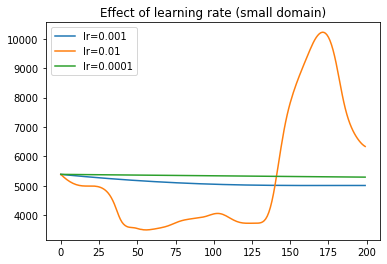

In [32]:
plt.plot(np.arange(200), o1[2][:, 1], label = 'lr=0.001')
plt.plot(np.arange(200), o2[2][:, 1], label = 'lr=0.01')
plt.plot(np.arange(200), o3[2][:, 1], label = 'lr=0.0001')
plt.legend()
plt.title('Effect of learning rate (small domain)');

### Effect of learning rate decay - every 10 steps

$\alpha=0.01,~~lr\_decay = 0.9$

In [37]:
o4 = optimize(G_messedup, 200, lr=1e-2, lr_decay=0.9, decay_frequency=10, verbose=10)

Iteration 0, Loss: 5388.533203125
Iteration 10, Loss: 5041.486328125
Iteration 20, Loss: 4993.68896484375
Iteration 30, Loss: 4912.0654296875
Iteration 40, Loss: 4398.9599609375
Iteration 50, Loss: 3679.41162109375
Iteration 60, Loss: 3578.369384765625
Iteration 70, Loss: 3516.2109375
Iteration 80, Loss: 3512.30615234375
Iteration 90, Loss: 3549.3125
Iteration 100, Loss: 3598.6396484375
Iteration 110, Loss: 3661.900146484375
Iteration 120, Loss: 3733.048095703125
Iteration 130, Loss: 3794.87060546875
Iteration 140, Loss: 3840.00927734375
Iteration 150, Loss: 3871.060546875
Iteration 160, Loss: 3893.000244140625
Iteration 170, Loss: 3909.82763671875
Iteration 180, Loss: 3924.209228515625
Iteration 190, Loss: 3937.748046875


$\alpha=0.01,~~lr\_decay = 0.7$

In [36]:
o5 = optimize(G_messedup, 200, lr=1e-2, lr_decay=0.7, decay_frequency=10, verbose=10)

Iteration 0, Loss: 5388.533203125
Iteration 10, Loss: 5041.486328125
Iteration 20, Loss: 4993.8076171875
Iteration 30, Loss: 4987.9736328125
Iteration 40, Loss: 4940.42626953125
Iteration 50, Loss: 4861.63037109375
Iteration 60, Loss: 4771.048828125
Iteration 70, Loss: 4683.60302734375
Iteration 80, Loss: 4607.74072265625
Iteration 90, Loss: 4546.43212890625
Iteration 100, Loss: 4499.203125
Iteration 110, Loss: 4463.91796875
Iteration 120, Loss: 4438.16015625
Iteration 130, Loss: 4419.60888671875
Iteration 140, Loss: 4406.35888671875
Iteration 150, Loss: 4396.9794921875
Iteration 160, Loss: 4390.34912109375
Iteration 170, Loss: 4385.67919921875
Iteration 180, Loss: 4382.38916015625
Iteration 190, Loss: 4380.09130859375


$\alpha=0.01,~~lr\_decay = 0.5$

In [38]:
o6 = optimize(G_messedup, 200, lr=1e-2, lr_decay=0.5, decay_frequency=10, verbose=10)

Iteration 0, Loss: 5388.533203125
Iteration 10, Loss: 5041.486328125
Iteration 20, Loss: 4995.57861328125
Iteration 30, Loss: 4995.748046875
Iteration 40, Loss: 4996.26025390625
Iteration 50, Loss: 4995.736328125
Iteration 60, Loss: 4995.16650390625
Iteration 70, Loss: 4994.79638671875
Iteration 80, Loss: 4994.599609375
Iteration 90, Loss: 4994.4736328125
Iteration 100, Loss: 4994.4228515625
Iteration 110, Loss: 4994.41259765625
Iteration 120, Loss: 4994.38720703125
Iteration 130, Loss: 4994.39794921875
Iteration 140, Loss: 4994.39697265625
Iteration 150, Loss: 4994.39599609375
Iteration 160, Loss: 4994.396484375
Iteration 170, Loss: 4994.37646484375
Iteration 180, Loss: 4994.384765625
Iteration 190, Loss: 4994.3857421875


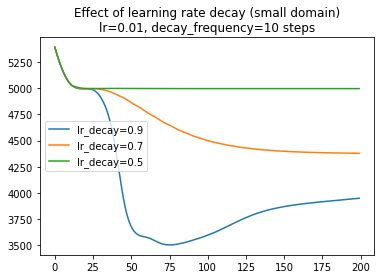

In [40]:
plt.plot(np.arange(200), o4[2][:, 1], label = 'lr_decay=0.9')
plt.plot(np.arange(200), o5[2][:, 1], label = 'lr_decay=0.7')
plt.plot(np.arange(200), o6[2][:, 1], label = 'lr_decay=0.5')
plt.legend()
plt.title('Effect of learning rate decay (small domain)\nlr=0.01, decay_frequency=10 steps');

### Effect of momentum

In [46]:
o7 = optimize(G_messedup, 200, lr=1e-2, lr_decay=0.9, decay_frequency=10, momentum = 0.7, verbose=10)

Iteration 0, Loss: 5388.533203125
Iteration 10, Loss: 4773.2939453125
Iteration 20, Loss: 3738.28466796875
Iteration 30, Loss: 3580.998046875
Iteration 40, Loss: 4370.01318359375
Iteration 50, Loss: 4724.212890625
Iteration 60, Loss: 3858.155517578125
Iteration 70, Loss: 3481.290283203125
Iteration 80, Loss: 4786.2119140625
Iteration 90, Loss: 6465.078125
Iteration 100, Loss: 4845.421875
Iteration 110, Loss: 4082.163330078125
Iteration 120, Loss: 4460.30615234375
Iteration 130, Loss: 5012.8876953125
Iteration 140, Loss: 4992.3212890625
Iteration 150, Loss: 6555.18408203125
Iteration 160, Loss: 7989.4716796875
Iteration 170, Loss: 8397.52734375
Iteration 180, Loss: 8375.92578125
Iteration 190, Loss: 8057.13818359375


In [47]:
o8 = optimize(G_messedup, 200, lr=1e-2, lr_decay=0.9, decay_frequency=10, momentum = 0.5, verbose=10)

Iteration 0, Loss: 5388.533203125
Iteration 10, Loss: 4912.19384765625
Iteration 20, Loss: 4543.84912109375
Iteration 30, Loss: 3589.357421875
Iteration 40, Loss: 3491.9111328125
Iteration 50, Loss: 3704.918701171875
Iteration 60, Loss: 3577.461669921875
Iteration 70, Loss: 3587.802490234375
Iteration 80, Loss: 3621.67529296875
Iteration 90, Loss: 3743.962158203125
Iteration 100, Loss: 3593.77685546875
Iteration 110, Loss: 3613.030029296875
Iteration 120, Loss: 3655.677490234375
Iteration 130, Loss: 4391.26708984375
Iteration 140, Loss: 6963.8642578125
Iteration 150, Loss: 7856.154296875
Iteration 160, Loss: 6475.5341796875
Iteration 170, Loss: 5368.94580078125
Iteration 180, Loss: 4907.22900390625
Iteration 190, Loss: 4873.8349609375


In [48]:
o9 = optimize(G_messedup, 200, lr=1e-2, lr_decay=0.9, decay_frequency=10, momentum = 0.3, verbose=10)

Iteration 0, Loss: 5388.533203125
Iteration 10, Loss: 4974.81982421875
Iteration 20, Loss: 4916.53466796875
Iteration 30, Loss: 4129.82275390625
Iteration 40, Loss: 3568.440673828125
Iteration 50, Loss: 3492.0546875
Iteration 60, Loss: 3552.499267578125
Iteration 70, Loss: 3592.4951171875
Iteration 80, Loss: 3695.892822265625
Iteration 90, Loss: 3766.462890625
Iteration 100, Loss: 3785.276611328125
Iteration 110, Loss: 3786.728759765625
Iteration 120, Loss: 3821.9208984375
Iteration 130, Loss: 3869.36083984375
Iteration 140, Loss: 3837.027587890625
Iteration 150, Loss: 3755.9443359375
Iteration 160, Loss: 3685.647216796875
Iteration 170, Loss: 3649.5498046875
Iteration 180, Loss: 3641.678466796875
Iteration 190, Loss: 3647.867431640625


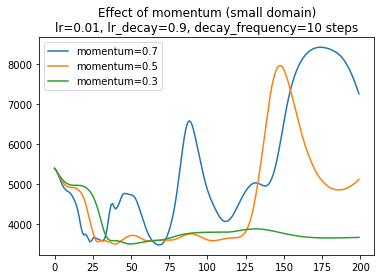

In [49]:
%matplotlib inline
plt.plot(np.arange(200), o7[2][:, 1], label = 'momentum=0.7')
plt.plot(np.arange(200), o8[2][:, 1], label = 'momentum=0.5')
plt.plot(np.arange(200), o9[2][:, 1], label = 'momentum=0.3')
plt.legend()
plt.title('Effect of momentum (small domain)\nlr=0.01, lr_decay=0.9, decay_frequency=10 steps');

### Nesterov Momentum

In [84]:
o10 = optimize(G_messedup, 200, lr=1e-2, lr_decay=0.9, decay_frequency=10, momentum = 0.7, verbose=20, nesterov=True)

Iteration 0, Loss: 5388.533203125
Iteration 20, Loss: 3625.481201171875
Iteration 40, Loss: 3828.732177734375
Iteration 60, Loss: 3658.67919921875
Iteration 80, Loss: 4458.92431640625
Iteration 100, Loss: 6441.4111328125
Iteration 120, Loss: 8893.62109375
Iteration 140, Loss: 9441.5302734375
Iteration 160, Loss: 7812.4765625
Iteration 180, Loss: 7165.51318359375


In [85]:
o11 = optimize(G_messedup, 200, lr=1e-2, lr_decay=0.9, decay_frequency=10, momentum = 0.5, verbose=10, nesterov=True)

Iteration 0, Loss: 5388.533203125
Iteration 10, Loss: 4834.5966796875
Iteration 20, Loss: 3516.663330078125
Iteration 30, Loss: 3552.67822265625
Iteration 40, Loss: 3778.38232421875
Iteration 50, Loss: 3808.596435546875
Iteration 60, Loss: 3724.88623046875
Iteration 70, Loss: 3570.781982421875
Iteration 80, Loss: 3686.78125
Iteration 90, Loss: 7007.765625
Iteration 100, Loss: 9694.5029296875
Iteration 110, Loss: 8552.8291015625
Iteration 120, Loss: 6054.3525390625
Iteration 130, Loss: 5321.27880859375
Iteration 140, Loss: 4503.43701171875
Iteration 150, Loss: 3837.12744140625
Iteration 160, Loss: 3663.26123046875
Iteration 170, Loss: 3598.73486328125
Iteration 180, Loss: 3570.23681640625
Iteration 190, Loss: 3599.782958984375


In [87]:
o12 = optimize(G_messedup, 200, lr=1e-2, lr_decay=0.9, decay_frequency=10, momentum = 0.3, verbose=10, nesterov=True)

Iteration 0, Loss: 5388.533203125
Iteration 10, Loss: 4946.94775390625
Iteration 20, Loss: 4585.21923828125
Iteration 30, Loss: 3572.581787109375
Iteration 40, Loss: 3490.877685546875
Iteration 50, Loss: 3589.572509765625
Iteration 60, Loss: 3617.29150390625
Iteration 70, Loss: 3707.64404296875
Iteration 80, Loss: 3687.396728515625
Iteration 90, Loss: 3769.24853515625
Iteration 100, Loss: 3676.867431640625
Iteration 110, Loss: 3593.93310546875
Iteration 120, Loss: 3640.557861328125
Iteration 130, Loss: 3655.529052734375
Iteration 140, Loss: 3980.666748046875
Iteration 150, Loss: 5301.50732421875
Iteration 160, Loss: 7005.3955078125
Iteration 170, Loss: 7382.2861328125
Iteration 180, Loss: 6570.1298828125
Iteration 190, Loss: 5723.96044921875


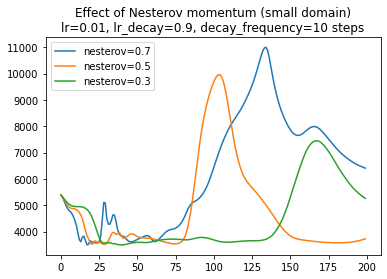

In [89]:
%matplotlib inline
plt.plot(np.arange(200), o10[2][:, 1], label = 'nesterov=0.7')
plt.plot(np.arange(200), o11[2][:, 1], label = 'nesterov=0.5')
plt.plot(np.arange(200), o12[2][:, 1], label = 'nesterov=0.3')
plt.legend()
plt.title('Effect of Nesterov momentum (small domain)\nlr=0.01, lr_decay=0.9, decay_frequency=10 steps');

In [91]:
import pickle
res = {'o1':o1, 'o2':o2, 'o3':o3, 'o4':o4, 'o5':o5, 'o6':o6, 'o7':o7, 'o8':o8, 'o9':o9, 'o10':o10, 'o11':o11, 'o12':o12}

with open('sim_res.pkl', 'wb') as f:
    pickle.dump(res, f)

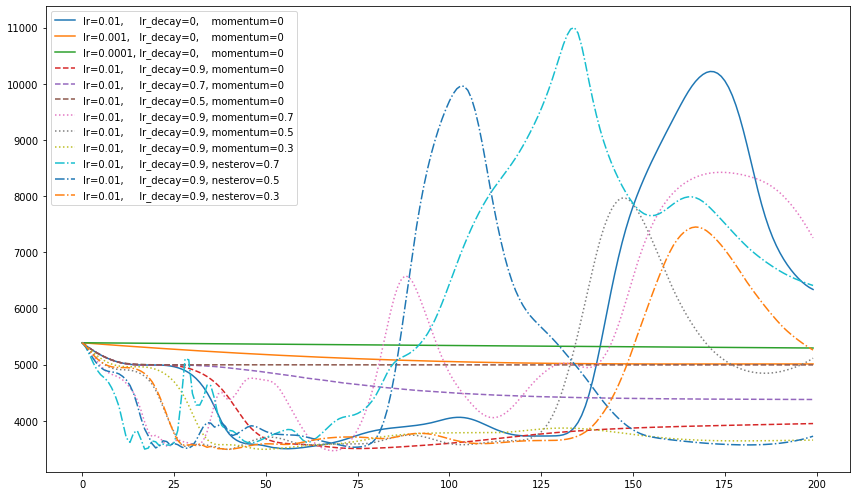

In [90]:
plt.figure(figsize=(12, 7))

plt.plot(np.arange(200), o2[2][:, 1],      label = 'lr=0.01,     lr_decay=0,    momentum=0')
plt.plot(np.arange(200), o1[2][:, 1],      label = 'lr=0.001,   lr_decay=0,    momentum=0')
plt.plot(np.arange(200), o3[2][:, 1],      label = 'lr=0.0001, lr_decay=0,    momentum=0')
plt.plot(np.arange(200), o4[2][:, 1], '--',label = 'lr=0.01,     lr_decay=0.9, momentum=0')
plt.plot(np.arange(200), o5[2][:, 1], '--',label = 'lr=0.01,     lr_decay=0.7, momentum=0')
plt.plot(np.arange(200), o6[2][:, 1], '--',label = 'lr=0.01,     lr_decay=0.5, momentum=0')
plt.plot(np.arange(200), o7[2][:, 1], ':', label = 'lr=0.01,     lr_decay=0.9, momentum=0.7')
plt.plot(np.arange(200), o8[2][:, 1], ':', label = 'lr=0.01,     lr_decay=0.9, momentum=0.5')
plt.plot(np.arange(200), o9[2][:, 1], ':', label = 'lr=0.01,     lr_decay=0.9, momentum=0.3')
plt.plot(np.arange(200), o10[2][:, 1], '-.', label = 'lr=0.01,     lr_decay=0.9, nesterov=0.7')
plt.plot(np.arange(200), o11[2][:, 1], '-.', label = 'lr=0.01,     lr_decay=0.9, nesterov=0.5')
plt.plot(np.arange(200), o12[2][:, 1], '-.', label = 'lr=0.01,     lr_decay=0.9, nesterov=0.3')

plt.legend()
plt.tight_layout()
plt.savefig('simulated_hyperparameters.png', dpi=200);

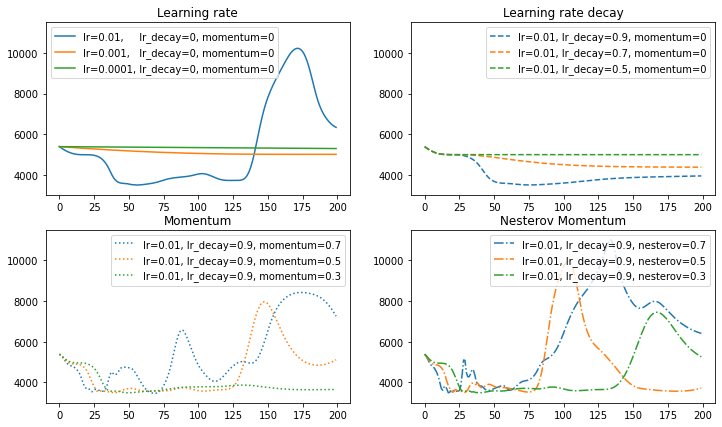

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

ax[0, 0].plot(np.arange(200), o2[2][:, 1],      label = 'lr=0.01,     lr_decay=0, momentum=0')
ax[0, 0].plot(np.arange(200), o1[2][:, 1],      label = 'lr=0.001,   lr_decay=0, momentum=0')
ax[0, 0].plot(np.arange(200), o3[2][:, 1],      label = 'lr=0.0001, lr_decay=0, momentum=0')
ax[0, 0].set_title('Learning rate')

ax[0, 1].plot(np.arange(200), o4[2][:, 1], '--',label = 'lr=0.01, lr_decay=0.9, momentum=0')
ax[0, 1].plot(np.arange(200), o5[2][:, 1], '--',label = 'lr=0.01, lr_decay=0.7, momentum=0')
ax[0, 1].plot(np.arange(200), o6[2][:, 1], '--',label = 'lr=0.01, lr_decay=0.5, momentum=0')
ax[0, 1].set_title('Learning rate decay')

ax[1, 0].plot(np.arange(200), o7[2][:, 1], ':', label = 'lr=0.01, lr_decay=0.9, momentum=0.7')
ax[1, 0].plot(np.arange(200), o8[2][:, 1], ':', label = 'lr=0.01, lr_decay=0.9, momentum=0.5')
ax[1, 0].plot(np.arange(200), o9[2][:, 1], ':', label = 'lr=0.01, lr_decay=0.9, momentum=0.3')
ax[1, 0].set_title('Momentum')

ax[1, 1].plot(np.arange(200), o10[2][:, 1], '-.', label = 'lr=0.01, lr_decay=0.9, nesterov=0.7')
ax[1, 1].plot(np.arange(200), o11[2][:, 1], '-.', label = 'lr=0.01, lr_decay=0.9, nesterov=0.5')
ax[1, 1].plot(np.arange(200), o12[2][:, 1], '-.', label = 'lr=0.01, lr_decay=0.9, nesterov=0.3')
ax[1, 1].set_title('Nesterov Momentum')

for i in range(2):
    for j in range(2):
        ax[i, j].set_ylim(3000, 11500)
        ax[i, j].legend()

plt.savefig('simulated_hyperparameters2.png', dpi=200);

In [63]:
%matplotlib widget
o9[0].visualize_structure()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …